## Sales Data Analysis


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import plotly.graph_objs as go
from plotly.offline import iplot

In [4]:
data = pd.read_csv("/content/Sales Data.csv")
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


Data Cleaning and Formatting

In [5]:
data.dtypes

Unnamed: 0            int64
Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object

In [6]:
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [7]:
data.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [8]:
data = data.dropna(how = "all")
data.shape

(185950, 11)

What is the best month for sale..?

In [9]:
'04/19/19 08:46'.split('/')[0]

'04'

In [10]:
def month(x):
    return str(x).split('/')[0]

Add month column

In [11]:
data["Month"] = data['Order Date'].apply(month)

In [12]:
data.dtypes

Unnamed: 0            int64
Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
Sales               float64
City                 object
Hour                  int64
dtype: object

In [13]:
data['Month'].unique()

array(['2019-12-30 00:01:00', '2019-12-29 07:03:00',
       '2019-12-12 18:21:00', ..., '2019-06-09 22:07:00',
       '2019-06-26 18:35:00', '2019-06-25 14:33:00'], dtype=object)

In [14]:
filter = data['Month'] == 'Order Date'
len(data[~filter])

185950

In [15]:
data = data[~filter]

In [16]:
data.shape


(185950, 11)

In [24]:
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019-12-30 00:01:00,1700.00,New York City,0.0
1,1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019-12-29 07:03:00,600.00,New York City,7.0
2,2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019-12-12 18:21:00,11.95,New York City,18.0
3,3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019-12-22 15:13:00,149.99,San Francisco,15.0
4,4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019-12-18 12:38:00,11.95,Atlanta,12.0


In [17]:
data['Month']

0         2019-12-30 00:01:00
1         2019-12-29 07:03:00
2         2019-12-12 18:21:00
3         2019-12-22 15:13:00
4         2019-12-18 12:38:00
                 ...         
185945    2019-06-07 19:02:00
185946    2019-06-01 19:29:00
185947    2019-06-22 18:57:00
185948    2019-06-26 18:35:00
185949    2019-06-25 14:33:00
Name: Month, Length: 185950, dtype: object

In [18]:
data.dtypes

Unnamed: 0            int64
Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
Sales               float64
City                 object
Hour                  int64
dtype: object

In [19]:
data['Price Each']= data['Price Each'].astype('float')


In [20]:
import numpy as np

data['Quantity Ordered'].isna().sum()
data['Quantity Ordered'].isin([np.inf, -np.inf]).sum()
data['Quantity Ordered'] = data['Quantity Ordered'].replace([np.inf, -np.inf, np.nan], 0)
data = data.dropna(subset=['Quantity Ordered'])
data['Quantity Ordered'] = data['Quantity Ordered'].astype('int')
data.dtypes

Unnamed: 0            int64
Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
Sales               float64
City                 object
Hour                  int64
dtype: object

In [21]:
data['Sales'] = data['Quantity Ordered'] * data['Price Each']
data.head(5)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019-12-30 00:01:00,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019-12-29 07:03:00,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019-12-12 18:21:00,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019-12-22 15:13:00,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019-12-18 12:38:00,11.95,Atlanta,12


In [22]:
data.groupby('Month')['Sales'].sum()

Month
2019-01-01 03:07:00     11.99
2019-01-01 03:40:00     11.95
2019-01-01 04:56:00    150.00
2019-01-01 05:53:00      2.99
2019-01-01 06:03:00     23.90
                        ...  
2020-01-01 04:06:00    149.99
2020-01-01 04:13:00      2.99
2020-01-01 04:21:00     11.95
2020-01-01 04:54:00     99.99
2020-01-01 05:13:00    114.94
Name: Sales, Length: 142395, dtype: float64

In [23]:
'917 1st St, Dallas, TX 75001'.split(',')[1]

' Dallas'

In [24]:
def city(x):
  return x.split(',')[1]

In [25]:
def city(x):
    if x and ',' in x:
        return x.split(',')[1]
    else:
        return np.nan
data['Purchase Address'] = data['Purchase Address'].astype(str)
data['city'] = data['Purchase Address'].apply(city)

In [26]:
data.groupby('city')['city'].count()

city
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: city, dtype: int64

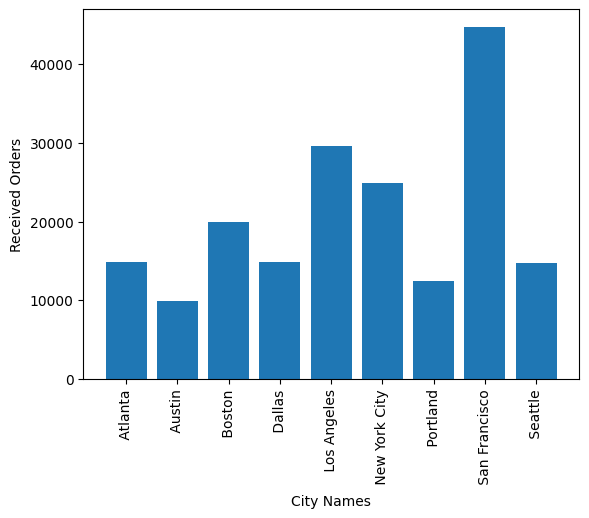

In [27]:
plt.bar(data.groupby('city')['city'].count().index, data.groupby('city')['city'].count())
plt.xticks(rotation = 'vertical')
plt.xlabel("City Names")
plt.ylabel("Received Orders")
plt.show()

What time should we display advertisements to maximise for product purchase..?

In [55]:
# data['Order Date'][0].dtype

In [28]:
data['Hour'] = pd.to_datetime(data['Order Date']).dt.hour


In [29]:
keys = []
hours = []
for key, hour_df in data.groupby('Order Date'):
    keys.append(key)
    hours.append(len(hour_df))

<Axes: xlabel='Product'>

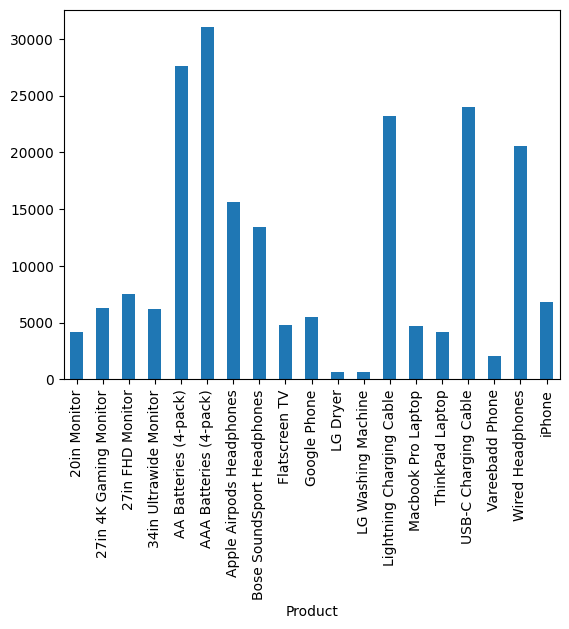

In [30]:
data.groupby('Product')["Quantity Ordered"].sum().plot(kind="bar")

In [31]:
data.groupby('Product')["Price Each"].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [32]:
product = data.groupby('Product')["Quantity Ordered"].sum().index
quantity = data.groupby('Product')["Quantity Ordered"].sum()
prices = data.groupby('Product')["Price Each"].mean()


<ipython-input-34-1fd0ad45ba0a>:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 4000x2400 with 0 Axes>

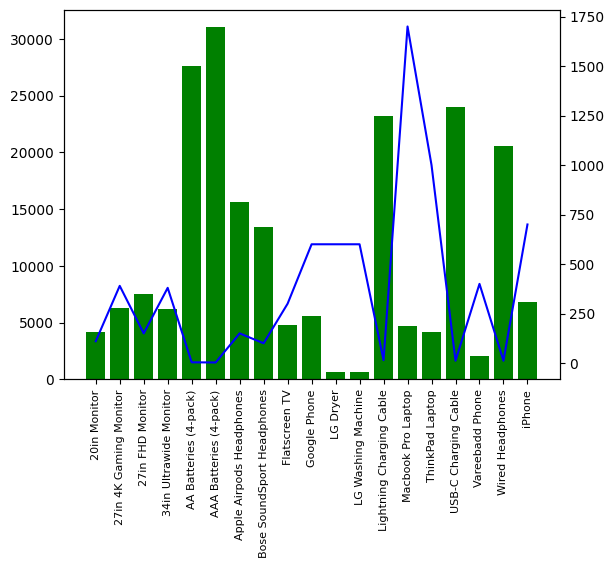

In [34]:
plt.figure(figsize=(40,24))
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(product, quantity, color='g')
ax2.plot(product, prices, 'b-')
ax1.set_xticklabels(product, rotation='vertical', size=8)

In [35]:
data.shape

(185950, 12)

In [37]:
df = data[data["Order ID"].duplicated(keep=False)]
df.head(20)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,city
16,16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019-12-25 12:37:00,600.00,Boston,12,Boston
17,17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019-12-25 12:37:00,11.95,Boston,12,Boston
18,18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019-12-25 12:37:00,99.99,Boston,12,Boston
19,19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019-12-25 12:37:00,11.99,Boston,12,Boston
36,36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",2019-12-13 14:32:00,400.00,New York City,14,New York City
37,37,295698,USB-C Charging Cable,2,11.95,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",2019-12-13 14:32:00,23.90,New York City,14,New York City
42,42,295703,AA Batteries (4-pack),1,3.84,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",2019-12-17 12:27:00,3.84,Austin,12,Austin
43,43,295703,Bose SoundSport Headphones,1,99.99,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",2019-12-17 12:27:00,99.99,Austin,12,Austin
66,66,295726,iPhone,1,700.00,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",2019-12-25 14:49:00,700.00,Boston,14,Boston
67,67,295726,Lightning Charging Cable,1,14.95,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",2019-12-25 14:49:00,14.95,Boston,14,Boston


In [38]:
df['Grouped'] = df.groupby("Order ID")['Product'].transform(lambda x: ','.join(x))

<ipython-input-38-04b3fbb8e064>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
df.shape

(14649, 13)

In [40]:
df2 = df.drop_duplicates(subset=["Order ID"])

<Axes: ylabel='count'>

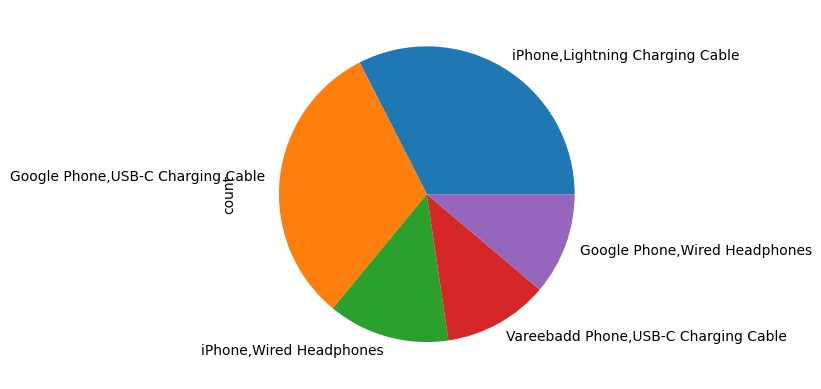

In [41]:
df2["Grouped"].value_counts()[0:5].plot.pie()

In [43]:
values = df2['Grouped'].value_counts()[:5]
labels = df2['Grouped'].value_counts()[:5].index


In [52]:
# Import the necessary function from the go module
from plotly.graph_objs import Pie

# Create the pie chart
traco = Pie(labels=labels, values=values,
            hoverinfo='label+percent', textinfo='value',
            textfont=dict(size=25),
            pull=[0, 0, 0, 0.2, 0])


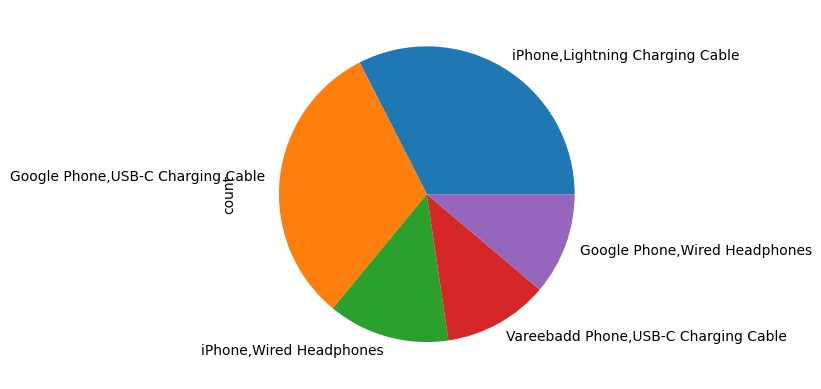

In [54]:
# Execute cell 'ipython-input-40-1e1dc9cf9574'
df2 = df.drop_duplicates(subset=["Order ID"])

# Execute cell 'ipython-input-41-1e1dc9cf9574'
df2["Grouped"].value_counts()[0:5].plot.pie()

# Execute cell 'ipython-input-43-1e1dc9cf9574'
values = df2['Grouped'].value_counts()[:5]
labels = df2['Grouped'].value_counts()[:5].index

# Execute cell 'ipython-input-49-1e1dc9cf9574'
# Import the necessary function from the go module
from plotly.graph_objs import Pie

# Create the pie chart
trace = Pie(labels=labels, values=values,
            hoverinfo='label+percent', textinfo='value',
            textfont=dict(size=25),
            pull=[0, 0, 0, 0.2, 0])

# Execute cell 'ipython-input-53-1e1dc9cf9574'
iplot([trace])